In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("file.csv")
df.head()

,Question Type,Answer Type,Topic Number,Question (Text Only),Correct Answer 1,Correct Answer 2,Correct Answer 3,Correct Answer 4,Wrong Answer 1,Wrong Answer 2,Wrong Answer 3,Time in seconds,Difficulty Level,Question (Image/ Audio/ Video),Contributor's Registered mailId,Solution (Text only),Solution (Image/ Audio/ Video),Variation Number
0,text,1,30202,"If $-4y - 2z$ = $-10y + 7z$, and if we subtra...",subtract $7$ from # $7$ वजा करावे,NaN,NaN,NaN,Multiply by $7$ to # $7$ ने गुणायला,divide RHS by $7$ to # $7$ ने भागावे,add $7$ to # $7$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $7$ from <br>If the same ope...,NaN,101
1,text,1,30202,"If $-6p - 8q$ = $-9p + 5q$, and if we subtrac...",subtract $2$ from # $2$ वजा करावे,NaN,NaN,NaN,Multiply by $2$ to # $2$ ने गुणायला,divide RHS by $2$ to # $2$ ने भागावे,add $2$ to # $2$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $2$ from <br>If the same ope...,NaN,101
2,text,1,30202,"If $1y - 8z$ = $3y - 6z$, and if we subtract ...",subtract $2$ from # $2$ वजा करावे,NaN,NaN,NaN,Multiply by $2$ to # $2$ ने गुणायला,divide RHS by $2$ to # $2$ ने भागावे,add $2$ to # $2$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $2$ from <br>If the same ope...,NaN,101
3,text,1,30202,"If $5u - 8v$ = $8u + 1v$, and if we subtract ...",subtract $3$ from # $3$ वजा करावे,NaN,NaN,NaN,Multiply by $3$ to # $3$ ने गुणायला,divide RHS by $3$ to # $3$ ने भागावे,add $3$ to # $3$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $3$ from <br>If the same ope...,NaN,101
4,text,1,30202,"If $-2x - 10y$ = $-4x + 2y$, and if we subtra...",subtract $3$ from # $3$ वजा करावे,NaN,NaN,NaN,Multiply by $3$ to # $3$ ने गुणायला,divide RHS by $3$ to # $3$ ने भागावे,add $3$ to # $3$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $3$ from <br>If the same ope...,NaN,101


Text(0, 0.5, 'Difficulty Level')

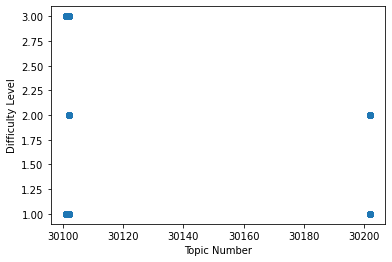

In [7]:
plt.scatter(df['Topic Number'],df['Difficulty Level'])
plt.xlabel('Topic Number')
plt.ylabel('Difficulty Level')

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Topic Number','Difficulty Level']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
km.cluster_centers_

array([[3.01011579e+04, 1.00000000e+00],
       [3.02020000e+04, 1.75000000e+00],
       [3.01016667e+04, 2.89655172e+00]])

In [10]:
df['cluster']=y_predicted
df.head()

,Question Type,Answer Type,Topic Number,Question (Text Only),Correct Answer 1,Correct Answer 2,Correct Answer 3,Correct Answer 4,Wrong Answer 1,Wrong Answer 2,Wrong Answer 3,Time in seconds,Difficulty Level,Question (Image/ Audio/ Video),Contributor's Registered mailId,Solution (Text only),Solution (Image/ Audio/ Video),Variation Number,cluster
0,text,1,30202,"If $-4y - 2z$ = $-10y + 7z$, and if we subtra...",subtract $7$ from # $7$ वजा करावे,NaN,NaN,NaN,Multiply by $7$ to # $7$ ने गुणायला,divide RHS by $7$ to # $7$ ने भागावे,add $7$ to # $7$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $7$ from <br>If the same ope...,NaN,101,1
1,text,1,30202,"If $-6p - 8q$ = $-9p + 5q$, and if we subtrac...",subtract $2$ from # $2$ वजा करावे,NaN,NaN,NaN,Multiply by $2$ to # $2$ ने गुणायला,divide RHS by $2$ to # $2$ ने भागावे,add $2$ to # $2$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $2$ from <br>If the same ope...,NaN,101,1
2,text,1,30202,"If $1y - 8z$ = $3y - 6z$, and if we subtract ...",subtract $2$ from # $2$ वजा करावे,NaN,NaN,NaN,Multiply by $2$ to # $2$ ने गुणायला,divide RHS by $2$ to # $2$ ने भागावे,add $2$ to # $2$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $2$ from <br>If the same ope...,NaN,101,1
3,text,1,30202,"If $5u - 8v$ = $8u + 1v$, and if we subtract ...",subtract $3$ from # $3$ वजा करावे,NaN,NaN,NaN,Multiply by $3$ to # $3$ ने गुणायला,divide RHS by $3$ to # $3$ ने भागावे,add $3$ to # $3$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $3$ from <br>If the same ope...,NaN,101,1
4,text,1,30202,"If $-2x - 10y$ = $-4x + 2y$, and if we subtra...",subtract $3$ from # $3$ वजा करावे,NaN,NaN,NaN,Multiply by $3$ to # $3$ ने गुणायला,divide RHS by $3$ to # $3$ ने भागावे,add $3$ to # $3$ मिळवायला,60,2,NaN,2018.rohan.pol@ves.ac.in,Answer - subtract $3$ from <br>If the same ope...,NaN,101,1


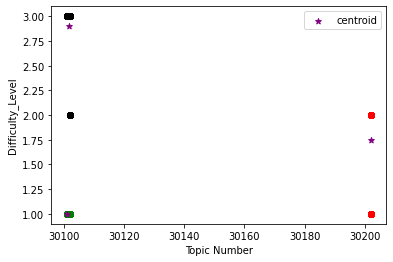

In [11]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Topic Number'],df1['Difficulty Level'],color='green')
plt.scatter(df2['Topic Number'],df2['Difficulty Level'],color='red')
plt.scatter(df3['Topic Number'],df3['Difficulty Level'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Topic Number')
plt.ylabel('Difficulty_Level')
plt.legend()

In [12]:
#print(df.cluster==1)

In [31]:
import mysql.connector
dodans_t=[]
time_t=[]
try:
        connection = mysql.connector.connect(host='127.0.0.1',
                                            database='quizapp',
                                            user='root',
                                            password='')

        sql_select_Query = "SELECT tbl_result.user_answer,tbl_result.right_answer,tbl_question.category  FROM tbl_result INNER JOIN tbl_question ON tbl_result.question_id=tbl_question.question_id WHERE tbl_result.student_id=1"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        print("Total number of rows in table: ", cursor.rowcount)

        #print("\nPrinting each row")
        for row in records:
            if(row[0]==row[1]):
                dodans_t.append([int(row[2]),1])
            elif(row[0]!=row[1]):
                dodans_t.append([int(row[2]),0])
            else:
                pass
            time_t.append(55)
            # print("SID = ", row[0], )
            # print("topicnumber = ", row[1])
            # print("variation  = ", row[2])
            # print("DOD  = ", row[3])
            # print("answer  = ", row[4])
            # print("timetaken  = ", row[5], "\n")

except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")


print(dodans_t)
print(time_t)

Total number of rows in table:  24
MySQL connection is closed
[[2, 0], [1, 1], [3, 1], [1, 1], [1, 1], [2, 1], [1, 1], [3, 1], [3, 0], [2, 0], [2, 1], [2, 1], [3, 1], [2, 0], [2, 1], [1, 1], [2, 0], [3, 1], [1, 1], [2, 1], [3, 0], [2, 0], [2, 1], [2, 1]]
[55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]


DOD 3
Correct Percentage 66.66666666666666
Wrong Percentage 33.33333333333333 

DOD 2
Correct Percentage 58.333333333333336
Wrong Percentage 41.66666666666667 

DOD 1
Correct Percentage 100.0
Wrong Percentage 0.0 



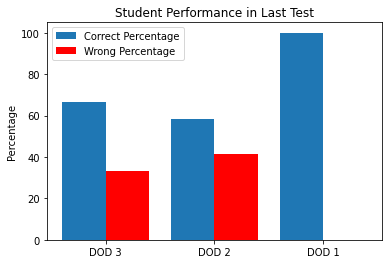

In [33]:
performance_array=[]
def performance_monitor(a):
    count_q=0
    count_ca=0
    count_wa=0
    for i in dodans_t:
        if i[0]==a:
            count_q=count_q+1
            if i[1]==0:
                count_wa=count_wa+1          
                
            elif i[1]==1:
                count_ca=count_ca+1           
                
        else:
            continue
    correct_percentage=((count_ca/count_q)*100)
    wrong_percentage=((count_wa/count_q)*100)
    performance_array.append([a,correct_percentage,wrong_percentage])
    print("DOD",a)
    print("Correct Percentage",correct_percentage)
    print("Wrong Percentage",wrong_percentage,"\n")

performance_monitor(3)
performance_monitor(2)
performance_monitor(1)

#print(performance_array)

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['DOD 3','DOD 2','DOD 1']
Ygirls = [0,0,0]
Zboys = [0,0,0]
index=0
for j in performance_array:
    Ygirls[index] = j[1]
    index=index+1 
index=0
for k in performance_array:
    Zboys[index] = k[2]
    index=index+1 
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Correct Percentage')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Wrong Percentage',color = 'r')
  
plt.xticks(X_axis, X)
plt.ylabel("Percentage")
plt.title("Student Performance in Last Test")
plt.legend()
plt.show()

In [34]:
def analyze():
    counts=[]
    countw=[]
    counto=[]
    for i in performance_array:
        if i[1]>60:
            counts.append(i[0])
        elif i[1]>40 and i[1]<60:
            counto.append(i[0])
        elif i[1]<40:
            countw.append(i[0])
        else:
            continue
    return counts,counto,countw

counts=[]
countw=[]
counto=[]
counts,counto,countw=analyze()

q=[[1,5],[2,5],[3,5]]
for j in q:
    if j[0] in counts:
        q[q.index(j)][1]=q[q.index(j)][1]-2
    elif j[0] in countw:
        q[q.index(j)][1]=q[q.index(j)][1]+3
print(q)

print("Recommeding these questions:")
for i in q:
    print(i[1]," questions of DOD ",i[0])
    

[[1, 3], [2, 5], [3, 3]]
Recommeding these questions:
3  questions of DOD  1
5  questions of DOD  2
3  questions of DOD  3


In [17]:
from csv import DictReader
import random
dod1=[]
dod2=[]
dod3=[]
def recmques():
  with open('file.csv', 'r',encoding='utf8', errors='ignore') as read_obj:
      csv_dict_reader = DictReader(read_obj)
      for row in csv_dict_reader:
          if row['Difficulty Level']==str(1):
            dod1.append([row['Topic Number'],row['Variation Number'],row['Difficulty Level'],row['Question (Text Only)'],row['Correct Answer 1'],row['Wrong Answer 1'],row['Wrong Answer 2'],row['Wrong Answer 3'],row['Solution (Text only)']])
          elif row['Difficulty Level']==str(2):
            dod2.append([row['Topic Number'],row['Variation Number'],row['Difficulty Level'],row['Question (Text Only)'],row['Correct Answer 1'],row['Wrong Answer 1'],row['Wrong Answer 2'],row['Wrong Answer 3'],row['Solution (Text only)']])
          elif row['Difficulty Level']==str(3):
            dod3.append([row['Topic Number'],row['Variation Number'],row['Difficulty Level'],row['Question (Text Only)'],row['Correct Answer 1'],row['Wrong Answer 1'],row['Wrong Answer 2'],row['Wrong Answer 3'],row['Solution (Text only)']])
          else:
            continue
recmques()

In [29]:
import mysql.connector
ques_att=[]
student=1
qpid=3
try:
        connection = mysql.connector.connect(host='127.0.0.1',
                                            database='quizapp',
                                            user='root',
                                            password='')

        sql_select_Query = "SELECT question FROM tbl_question where sid=1"
        cursor = connection.cursor()
        cursor.execute(sql_select_Query)
        records = cursor.fetchall()
        print("Total number of rows in table: ", cursor.rowcount)

        #print("\nPrinting each row")
        for row in records:
            ques_att.append([row[0]])
            # print("SID = ", row[0], )
            # print("topicnumber = ", row[1])
            # print("variation  = ", row[2])
            # print("DOD  = ", row[3])
            # print("answer  = ", row[4])
            # print("timetaken  = ", row[5], "\n")

except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")


print(ques_att)

Total number of rows in table:  19
MySQL connection is closed
[['Following two expressions  $11 - 5$ and $1 \\times 6$ will form two sides (LHS and RHS) of an equation. <br> # खाली दिलेली दोन विधाने  $11 - 5$ आणि  $1 \\times 6$ मिळून समीकरण (डावी बाजू = उजवी बाजू) बनवू शकतात.'], ['Following two expressions  $13 - 1$ and $6 \\times 2$ will form two sides (LHS and RHS) of an equation. <br> # खाली दिलेली दोन विधाने  $13 - 1$ आणि  $6 \\times 2$ मिळून समीकरण (डावी बाजू = उजवी बाजू) बनवू शकतात.'], ['Following two expressions  $16 - 8$ and $8 + 0$ will form two sides (LHS and RHS) of an equation. <br> # खाली दिलेली दोन विधाने  $16 - 8$ आणि  $8 + 0$ मिळून समीकरण (डावी बाजू = उजवी बाजू) बनवू शकतात.'], ['Following two expressions  $10 + 10$ and $20 - 0$ will form two sides (LHS and RHS) of an equation. <br> # खाली दिलेली दोन विधाने  $10 + 10$ आणि  $20 - 0$ मिळून समीकरण (डावी बाजू = उजवी बाजू) बनवू शकतात.'], ['Following two expressions  $3 \\times 6$ and $20 - 13$ will form two sides (LHS and RHS

In [30]:
import mysql.connector
tp="30102"
student=1
qpid=3
tpr1=[]
tpr2=[]
tpr3=[]
for j in dod1:
            if j[0]==tp:
                tpr1.append(j)
for j in dod2:
            if j[0]==tp:
                tpr2.append(j)
for j in dod3:
            if j[0]==tp:
                tpr3.append(j)
for j in tpr1:
    if j[3] in ques_att[1]:
        tpr1.remove(j)
for j in tpr2:
    if j[3] in ques_att[1]:
        tpr2.remove(j)
for j in tpr3:
    if j[3] in ques_att[1]:
        tpr3.remove(j)        
for i in range(q[0][1]):
    try:
        connection = mysql.connector.connect(host='127.0.0.1',
                                            database='quizapp',
                                            user='root',
                                            password='')
        sql_select_Query = "INSERT INTO tbl_question (qpid,sid,question, first_answer, second_answer, third_answer, fourth_answer, fifth_answer,answer, reason, marks, category, faculty, variation, is_active) VALUES (%s,%s,%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)"
        # for j in dod1:
        #     if j[0]==tp:
        #         tpr1.append(j) 
        a=random.choice(tpr1)
        tpr1.remove(a)
        print(a)
        val = (qpid,student,a[3],a[5],a[4],a[6],a[7],'null',2,a[8],4,a[2],a[0],a[1],'yes')
        cursor = connection.cursor()
        cursor.execute(sql_select_Query,val)
        connection.commit()
        # get all records
        # records = cursor.fetchall()
        # print("Total number of rows in table: ", cursor.rowcount)

        # print("\nPrinting each row")
        # for row in records:
        #     print("SID = ", row[0], )
        #     print("topicnumber = ", row[1])
        #     print("variation  = ", row[2])
        #     print("DOD  = ", row[3])
        #     print("answer  = ", row[4])
        #     print("timetaken  = ", row[5], "\n")

    except mysql.connector.Error as e:
        print("Error reading data from MySQL table", e)
    finally:
        if connection.is_connected():
            connection.close()
            cursor.close()
            print("MySQL connection is closed")

for i in range(q[1][1]):
    try:
        connection = mysql.connector.connect(host='127.0.0.1',
                                            database='quizapp',
                                            user='root',
                                            password='')

        sql_select_Query = "INSERT INTO tbl_question (qpid,sid,question, first_answer, second_answer, third_answer, fourth_answer, fifth_answer,answer, reason, marks, category, faculty, variation, is_active) VALUES (%s,%s,%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)"
        # for j in dod2:
        #     if j[0]==tp:
        #         tpr2.append(j)
        a=random.choice(tpr2)
        tpr2.remove(a)
        val = (qpid,student,a[3],a[5],a[4],a[6],a[7],'null',2,a[8],4,a[2],a[0],a[1],'yes')
        cursor = connection.cursor()
        cursor.execute(sql_select_Query,val)
        connection.commit()
        # get all records
        # records = cursor.fetchall()
        # print("Total number of rows in table: ", cursor.rowcount)

        # print("\nPrinting each row")
        # for row in records:
        #     print("SID = ", row[0], )
        #     print("topicnumber = ", row[1])
        #     print("variation  = ", row[2])
        #     print("DOD  = ", row[3])
        #     print("answer  = ", row[4])
        #     print("timetaken  = ", row[5], "\n")

    except mysql.connector.Error as e:
        print("Error reading data from MySQL table", e)
    finally:
        if connection.is_connected():
            connection.close()
            cursor.close()
            print("MySQL connection is closed")

for i in range(q[2][1]):
    try:
        connection = mysql.connector.connect(host='127.0.0.1',
                                            database='quizapp',
                                            user='root',
                                            password='')

        sql_select_Query = "INSERT INTO tbl_question (qpid,sid,question, first_answer, second_answer, third_answer, fourth_answer, fifth_answer,answer, reason, marks, category, faculty, variation, is_active) VALUES (%s,%s,%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,%s)"
        # for j in dod3:
        #     if j[0]==tp:
        #         tpr3.append(j)
        a=random.choice(tpr3)
        tpr3.remove(a)
        val = (qpid,student,a[3],a[5],a[4],a[6],a[7],'null',2,a[8],4,a[2],a[0],a[1],'yes')
        cursor = connection.cursor()
        cursor.execute(sql_select_Query,val)
        connection.commit()
        # get all records
        # records = cursor.fetchall()
        # print("Total number of rows in table: ", cursor.rowcount)

        # print("\nPrinting each row")
        # for row in records:
        #     print("SID = ", row[0], )
        #     print("topicnumber = ", row[1])
        #     print("variation  = ", row[2])
        #     print("DOD  = ", row[3])
        #     print("answer  = ", row[4])
        #     print("timetaken  = ", row[5], "\n")

    except mysql.connector.Error as e:
        print("Error reading data from MySQL table", e)
    finally:
        if connection.is_connected():
            connection.close()
            cursor.close()
            print("MySQL connection is closed")

['30102', '1', '1', 'Following two expressions  $5 \\times 4$ and $18 + 2$ will form two sides (LHS and RHS) of an equation. <br> # खाली दिलेली दोन विधाने  $5 \\times 4$ आणि  $18 + 2$ मिळून समीकरण (डावी बाजू = उजवी बाजू) बनवू शकतात.', 'True <br> # बरोबर', 'False <br> # चूक', '', '', 'Answer - True<br>In mathematics we can equate any two expressions if the values of both sides of expressions\xa0are equal.<br>Here, $ 5 \\times 4 = 20 $ and $ 18 + 2 = 20 $<br>Since both the given expressions are giving the same value we can equate these two to form an equation.<br>$5 \\times 4 = 18 + 2$<br> # उत्तर - बरोबर <br>जेंव्हा दोन गणिती विधानांचे मूल्य समान असते तेव्हा ती दोन विधाने समीकरण पध्दतीने मांडता येतात.<br>$ 5 \\times 4 = 20 $ आणि $ 18 + 2 = 20 $ <br>येथे दिलेल्या दोन्ही गणिती विधानांचे मूल्य समान आहे. त्यामुळे दिलेली दोन्ही विधाने मिळून समीकरण पध्दतीने मांडता येतील.<br>$5 \\times 4 = 18 + 2$']
MySQL connection is closed
['30102', '1', '1', 'Following two expressions  $10 + 10$ and $20 - 

In [ ]:
import mysql.connector
try:
    connection = mysql.connector.connect(host='127.0.0.2',
                                         database='coep',
                                         user='root',
                                         password='root')

    sql_select_Query = "select * from studentperformance where SID=1 and question_paper_id=2"
    cursor = connection.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)

    print("\nPrinting each row")
    for row in records:
        print("SID = ", row[0])
        print("question paper id = ", row[1])
        print("topicnumber = ", row[2])
        print("variation  = ", row[3])
        print("DOD  = ", row[4])
        print("question  = ", row[5])
        print("coption  = ", row[6])
        print("woption1  = ", row[7])
        print("woption2  = ", row[8])
        print("woption3  = ", row[9])
        print("solution = ", row[10])
        print("answer = ", row[11])
        print("timetaken  = ", row[12], "\n")

except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")


In [ ]:
import csv  

header = ['SID', 'quespaperID', 'dod', 'question','option1','option2','option3','option4']

with open('S1Q2questionpaper.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)
    
    for row in records:
    # write the data
        data=[row[0],row[1],row[4],row[5],row[6],row[7],row[8],row[9]]
        writer.writerow(data)

header = ['SID', 'quespaperID', 'dod', 'question','coption','solution']

with open('S1Q2solution.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)
    
    for row in records:
    # write the data
        data=[row[0],row[1],row[4],row[5],row[6],row[10]]
        writer.writerow(data)